#Rough Set

In [1]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("winered.csv",sep=';')
df

alcohol     VA    CA   RS  ...  density    pH  sulphates  quality
0         9.4  0.700  0.00  1.9  ...  0.99780  3.51       0.56        5
1         9.8  0.880  0.00  2.6  ...  0.99680  3.20       0.68        5
2         9.8  0.760  0.04  2.3  ...  0.99700  3.26       0.65        5
3         9.8  0.280  0.56  1.9  ...  0.99800  3.16       0.58        6
4         9.4  0.700  0.00  1.9  ...  0.99780  3.51       0.56        5
...       ...    ...   ...  ...  ...      ...   ...        ...      ...
1594     10.5  0.600  0.08  2.0  ...  0.99490  3.45       0.58        5
1595     11.2  0.550  0.10  2.2  ...  0.99512  3.52       0.76        6
1596     11.0  0.510  0.13  2.3  ...  0.99574  3.42       0.75        6
1597     10.2  0.645  0.12  2.0  ...  0.99547  3.57       0.71        5
1598     11.0  0.310  0.47  3.6  ...  0.99549  3.39       0.66        6

[1599 rows x 11 columns]

In [3]:
df=df.iloc[::,1:]         
#df1=df.iloc[::,:-1] #memisahkan antara variabel x dan y
df

VA    CA   RS  chlorides  ...  density    pH  sulphates  quality
0     0.700  0.00  1.9      0.076  ...  0.99780  3.51       0.56        5
1     0.880  0.00  2.6      0.098  ...  0.99680  3.20       0.68        5
2     0.760  0.04  2.3      0.092  ...  0.99700  3.26       0.65        5
3     0.280  0.56  1.9      0.075  ...  0.99800  3.16       0.58        6
4     0.700  0.00  1.9      0.076  ...  0.99780  3.51       0.56        5
...     ...   ...  ...        ...  ...      ...   ...        ...      ...
1594  0.600  0.08  2.0      0.090  ...  0.99490  3.45       0.58        5
1595  0.550  0.10  2.2      0.062  ...  0.99512  3.52       0.76        6
1596  0.510  0.13  2.3      0.076  ...  0.99574  3.42       0.75        6
1597  0.645  0.12  2.0      0.075  ...  0.99547  3.57       0.71        5
1598  0.310  0.47  3.6      0.067  ...  0.99549  3.39       0.66        6

[1599 rows x 10 columns]

In [4]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['quality'].value_counts()

In [5]:
#Encoding dengan data sedikit
#cleanup_nums = {"quality":     {"good": 1, "bad": 2}}
#df = df.replace(cleanup_nums)
#df

#Core and Reduct

In [6]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [7]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['quality']=faktor.iloc[::,-1]
    return df_CR

In [8]:
df_CR=Core_and_Reduct(df)
df_CR

VA    CA   RS  chlorides   TSD  quality
0     0.700  0.00  1.9      0.076  34.0        5
1     0.880  0.00  2.6      0.098  67.0        5
2     0.760  0.04  2.3      0.092  54.0        5
3     0.280  0.56  1.9      0.075  60.0        6
4     0.700  0.00  1.9      0.076  34.0        5
...     ...   ...  ...        ...   ...      ...
1594  0.600  0.08  2.0      0.090  44.0        5
1595  0.550  0.10  2.2      0.062  51.0        6
1596  0.510  0.13  2.3      0.076  40.0        6
1597  0.645  0.12  2.0      0.075  44.0        5
1598  0.310  0.47  3.6      0.067  42.0        6

[1599 rows x 6 columns]

In [9]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [10]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')

In [11]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

Unnamed: 0     VA    CA   RS  chlorides   TSD  quality
0              0  0.700  0.00  1.9      0.076  34.0        5
1              1  0.880  0.00  2.6      0.098  67.0        5
2              2  0.760  0.04  2.3      0.092  54.0        5
3              3  0.280  0.56  1.9      0.075  60.0        6
4              4  0.700  0.00  1.9      0.076  34.0        5
...          ...    ...   ...  ...        ...   ...      ...
1594        1594  0.600  0.08  2.0      0.090  44.0        5
1595        1595  0.550  0.10  2.2      0.062  51.0        6
1596        1596  0.510  0.13  2.3      0.076  40.0        6
1597        1597  0.645  0.12  2.0      0.075  44.0        5
1598        1598  0.310  0.47  3.6      0.067  42.0        6

[1599 rows x 7 columns]

In [12]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

VA    CA   RS  chlorides   TSD  quality
0     0.700  0.00  1.9      0.076  34.0        5
1     0.880  0.00  2.6      0.098  67.0        5
2     0.760  0.04  2.3      0.092  54.0        5
3     0.280  0.56  1.9      0.075  60.0        6
4     0.700  0.00  1.9      0.076  34.0        5
...     ...   ...  ...        ...   ...      ...
1594  0.600  0.08  2.0      0.090  44.0        5
1595  0.550  0.10  2.2      0.062  51.0        6
1596  0.510  0.13  2.3      0.076  40.0        6
1597  0.645  0.12  2.0      0.075  44.0        5
1598  0.310  0.47  3.6      0.067  42.0        6

[1599 rows x 6 columns]

In [13]:
df_tsk.describe()

VA           CA  ...          TSD      quality
count  1599.000000  1599.000000  ...  1599.000000  1599.000000
mean      0.527821     0.270976  ...    46.217636     5.636023
std       0.179060     0.194801  ...    31.834539     0.807569
min       0.120000     0.000000  ...     6.000000     3.000000
25%       0.390000     0.090000  ...    22.000000     5.000000
50%       0.520000     0.260000  ...    38.000000     6.000000
75%       0.640000     0.420000  ...    62.000000     6.000000
max       1.580000     1.000000  ...   165.000000     8.000000

[8 rows x 6 columns]

In [14]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

VA           0
CA           0
RS           0
chlorides    0
TSD          0
quality      0
dtype: int64

In [15]:
df_tsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VA         1599 non-null   float64
 1   CA         1599 non-null   float64
 2   RS         1599 non-null   float64
 3   chlorides  1599 non-null   float64
 4   TSD        1599 non-null   float64
 5   quality    1599 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 75.1 KB


#Info Atribute
1. fixed acidity/keasaman tetap
2. volatile acidity/keasaman yang mudah menguap= (cepat, lambat)
3. citric acid/asam sitrat=(tinggi, rendah) 
4. residual sugar/sisa gula=(banyak, sedikit)
5. chlorides/klorida=(lebih, kurang)
6. free sulfur dioxide/bebas sulfur dioksida
7. total sulfur dioxide/total sulfur dioksida=(terpenuhi, cukup)
8. density/kepadatan
9. pH
10. sulphates/sulfat
11. alcohol/alkohol
12. quality ('good' and 'bad' based on score >5 and <5)/kualitas ('baik' dan 'buruk' berdasarkan skor >5 dan <5)


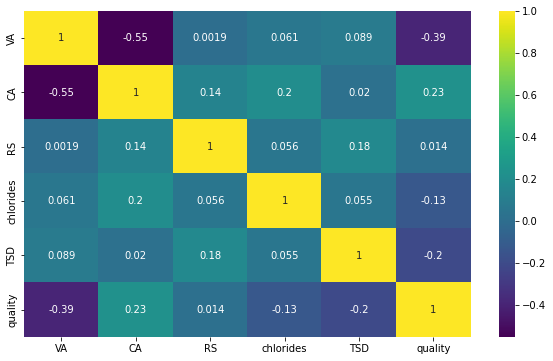

In [16]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

##Fuzzy A

In [17]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [18]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

##Fuzzy B

In [19]:
def fungsi_segitiga1(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu1 = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu1[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu1[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu1[idx] = 1
    
    return miu1

In [20]:
def miu_fungsi_segitiga1(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu1 = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu1[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu1[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu1[idx] = 1

    dict_fuzzy1=res = {round(array_x[i],2): miu1[i] for i in range(len(array_x))}
    print(dict_fuzzy1)
    hasil1 = dict_fuzzy1[x_i]

    return hasil1

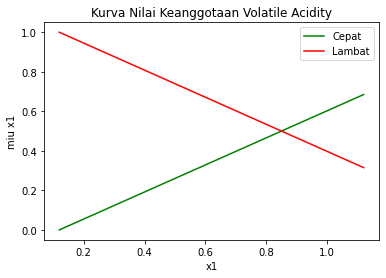

In [21]:
# Pembentukan Himpunan Fuzzy Volatile Acidity [fungsi buat sendiri]
x_VA= np.arange(0.12, 1.58, 0.5) # Semesta Pembicaraan
amb_cepat = [0.12, 1.58, 1.58]
amb_lambat = [0.12, 0.12, 1.58]

miu_VA_cepat = fungsi_segitiga(x_VA, amb_cepat)
miu_VA_lambat = fungsi_segitiga(x_VA, amb_lambat)

import matplotlib.pyplot as plt
plt.plot(x_VA, miu_VA_cepat, label = "Cepat", color='green')
plt.plot(x_VA, miu_VA_lambat, label = "Lambat", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Volatile Acidity')
plt.legend()
plt.show()

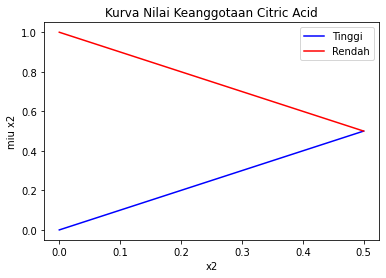

In [22]:
# Pembentukan Himpunan Fuzzy Citric Acid [fungsi buat sendiri]
x_CA= np.arange(0, 1, 0.5) # Semesta Pembicaraan
amb_tinggi  = [0, 1, 1]
amb_rendah = [0, 0, 1]

miu_CA_tinggi  = fungsi_segitiga(x_CA, amb_tinggi)
miu_CA_rendah = fungsi_segitiga(x_CA, amb_rendah)

import matplotlib.pyplot as plt
plt.plot(x_CA, miu_CA_tinggi,  label = "Tinggi",  color='blue')
plt.plot(x_CA, miu_CA_rendah, label = "Rendah", color='red')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan Citric Acid')
plt.legend()
plt.show()

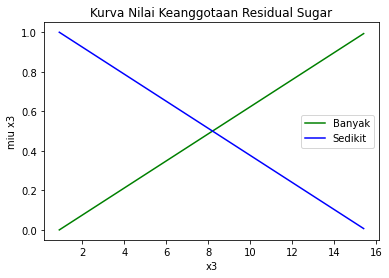

In [23]:
# Pembentukan Himpunan Fuzzy Residual Sugar [fungsi buat sendiri]
x_RS= np.arange(0.9, 15.5, 0.5) # Semesta Pembicaraan
amb_banyak  = [0.9, 15.5, 15.5]
amb_sedikit  = [0.9, 0.9, 15.5]

miu_RS_banyak  = fungsi_segitiga(x_RS, amb_banyak)
miu_RS_sedikit   = fungsi_segitiga(x_RS, amb_sedikit)

import matplotlib.pyplot as plt
plt.plot(x_RS, miu_RS_banyak,  label = "Banyak",  color='green')
plt.plot(x_RS, miu_RS_sedikit, label = "Sedikit", color='blue')
plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Residual Sugar')
plt.legend()
plt.show()

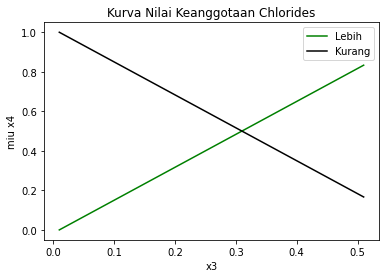

In [24]:
# Pembentukan Himpunan Fuzzy Chlorides [fungsi buat sendiri]
x_chlorides= np.arange(0.01, 0.61, 0.5) # Semesta Pembicaraan
amb_lebih  = [0.01, 0.61, 0.61]
amb_kurang  = [0.01, 0.01, 0.61]

miu_chlorides_lebih  = fungsi_segitiga(x_chlorides, amb_lebih)
miu_chlorides_kurang   = fungsi_segitiga(x_chlorides, amb_kurang)

import matplotlib.pyplot as plt
plt.plot(x_chlorides, miu_chlorides_lebih,  label = "Lebih",  color='green')
plt.plot(x_chlorides, miu_chlorides_kurang, label = "Kurang", color='black')
plt.xlabel('x3')
plt.ylabel('miu x4')
plt.title('Kurva Nilai Keanggotaan Chlorides')
plt.legend()
plt.show()

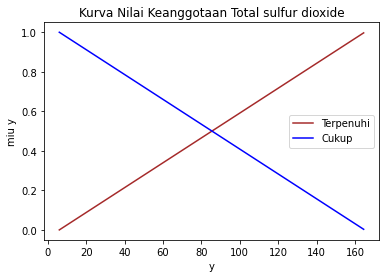

In [25]:
# Pembentukan Himpunan Fuzzy total sulfur dioxide [fungsi buat sendiri]
x_TSD= np.arange(6, 165, 0.5) # Semesta Pembicaraan
amb_terpenuhi  = [6, 165, 165]
amb_cukup = [6, 6, 165]

miu_TSD_terpenuhi  = fungsi_segitiga(x_TSD, amb_terpenuhi)
miu_TSD_cukup  = fungsi_segitiga(x_TSD, amb_cukup)

import matplotlib.pyplot as plt
plt.plot(x_TSD, miu_TSD_terpenuhi,  label = "Terpenuhi",  color='brown')
plt.plot(x_TSD, miu_TSD_cukup, label = "Cukup", color='blue')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Total sulfur dioxide')
plt.legend()
plt.show()

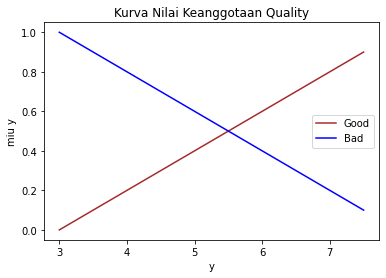

In [26]:
# Pembentukan Himpunan Fuzzy Quality [fungsi buat sendiri]
x_quality= np.arange(3, 8, 0.5) # Semesta Pembicaraan
amb_good  = [3, 8, 8]
amb_bad  = [3, 3, 8]

miu_quality_good  = fungsi_segitiga(x_quality, amb_good)
miu_quality_bad   = fungsi_segitiga(x_quality, amb_bad)

import matplotlib.pyplot as plt
plt.plot(x_quality, miu_quality_good,  label = "Good",  color='brown')
plt.plot(x_quality, miu_quality_bad, label = "Bad", color='blue')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Quality')
plt.legend()
plt.show()

In [27]:
def fuzzyfikasi(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil=0
    if x < batas:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    return hasil, label_hasil

In [28]:
def fuzzyfikasi1(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil1=0
    if x < batas:
        hasil1=miu_fungsi_segitiga1(x_array, amd_1, x)
        label_hasil1 = label_1
    else:
        hasil1=miu_fungsi_segitiga1(x_array, amd_2, x)
        label_hasil1 = label_2
    return hasil1, label_hasil1

In [29]:
x_VA= np.arange(0, 1.58, 0.5)
amb_cepat = [0.12, 1.58, 1.58]
amb_lambat = [0.12, 0.12, 1.58]

fuzzifikasi_VA=[]
miu_VA=[]
for i in df.VA:
    hasil=fuzzyfikasi(x_VA, amb_cepat, amb_lambat, i, "Cepat", "Lambat")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_VA.append(fuzz)
    miu_VA.append(m)
    
len(fuzzifikasi_VA)

0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.9452054794520548}
0.75
{0.0: 0.0, 0.5: 0.7397260273972603, 1.0: 0.3972602739726028, 1.5: 0.05479452054794526}
0.75
{0.0: 0.0, 0.5: 0.7397260273972603, 1.0: 0.3972602739726028, 1.5: 0.05479452054794526}
0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.9452054794520548}
0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.9452054794520548}
0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.9452054794520548}
0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.9452054794520548}
0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.9452054794520548}
0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.9452054794520548}
0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.9452054794520548}
0.75
{0.0: 0.0, 0.5: 0.2602739726027397, 1.0: 0.6027397260273972, 1.5: 0.945205479452054

1599

In [30]:
x_CA= np.arange(0, 2, 0.5) 
amb_tinggi  = [0, 1, 1]
amb_rendah = [0, 0, 1]

fuzzifikasi_CA=[]
miu_CA=[]
for i in df.CA:
    hasil=fuzzyfikasi(x_CA, amb_tinggi, amb_rendah, i, "Tinggi", "Rendah")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_CA.append(fuzz)
    miu_CA.append(m)

len(fuzzifikasi_CA)

0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0, 1.5: 0.0}
0.75
{0.0: 0.0, 0.5: 0.5, 1.0: 1.0

1599

In [31]:
x_RS= np.arange(0, 15.5, 0.5)
amb_banyak  = [0.9, 15.5, 15.5]
amb_sedikit  = [0.9, 0.9, 15.5]

fuzzifikasi_RS=[]
miu_RS=[]
for i in df.RS:
    hasil=fuzzyfikasi(x_RS, amb_banyak, amb_sedikit, i, "Banyak", "Sedikit")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_RS.append(fuzz)
    miu_RS.append(m)
len(fuzzifikasi_RS)

7.5
{0.0: 0.0, 0.5: 0.0, 1.0: 0.0068493150684931494, 1.5: 0.0410958904109589, 2.0: 0.07534246575342467, 2.5: 0.10958904109589042, 3.0: 0.14383561643835618, 3.5: 0.17808219178082194, 4.0: 0.2123287671232877, 4.5: 0.24657534246575344, 5.0: 0.28082191780821913, 5.5: 0.3150684931506849, 6.0: 0.3493150684931507, 6.5: 0.3835616438356164, 7.0: 0.4178082191780822, 7.5: 0.4520547945205479, 8.0: 0.4863013698630137, 8.5: 0.5205479452054794, 9.0: 0.5547945205479452, 9.5: 0.589041095890411, 10.0: 0.6232876712328766, 10.5: 0.6575342465753424, 11.0: 0.6917808219178082, 11.5: 0.726027397260274, 12.0: 0.7602739726027398, 12.5: 0.7945205479452054, 13.0: 0.8287671232876712, 13.5: 0.863013698630137, 14.0: 0.8972602739726028, 14.5: 0.9315068493150684, 15.0: 0.9657534246575342}
7.5
{0.0: 0.0, 0.5: 0.0, 1.0: 0.0068493150684931494, 1.5: 0.0410958904109589, 2.0: 0.07534246575342467, 2.5: 0.10958904109589042, 3.0: 0.14383561643835618, 3.5: 0.17808219178082194, 4.0: 0.2123287671232877, 4.5: 0.24657534246575344, 

1599

In [32]:
x_chlorides= np.arange(0, 0.61, 0.5) # Semesta Pembicaraan
amb_lebih  = [0.01, 0.61, 0.61]
amb_kurang  = [0.01, 0.01, 0.61]

fuzzifikasi_chlorides=[]
miu_chlorides=[]
for i in df.chlorides:
    hasil=fuzzyfikasi(x_chlorides, amb_lebih, amb_kurang, i, "Lebih", "Kurang")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_chlorides.append(fuzz)
    miu_chlorides.append(m)
len(fuzzifikasi_chlorides)

0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.18333333333333332}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.18333333333333332}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0, 0.5: 0.8166666666666667}
0.25
{0.0: 0.0

1599

In [33]:
x_TSD= np.arange(6, 166, 0.5) # Semesta Pembicaraan
amb_terpenuhi  = [6, 165, 165]
amb_cukup = [6, 6, 165]

fuzzifikasi_TSD=[]
miu_TSD=[]
for i in df.TSD:
    hasil=fuzzyfikasi(x_TSD, amb_terpenuhi, amb_cukup, i, "Terpenuhi", "Cukup")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_TSD.append(fuzz)
    miu_TSD.append(m)
len(fuzzifikasi_TSD)

85.75
{6.0: 0.0, 6.5: 0.0031446540880503146, 7.0: 0.006289308176100629, 7.5: 0.009433962264150943, 8.0: 0.012578616352201259, 8.5: 0.015723270440251572, 9.0: 0.018867924528301886, 9.5: 0.0220125786163522, 10.0: 0.025157232704402517, 10.5: 0.02830188679245283, 11.0: 0.031446540880503145, 11.5: 0.03459119496855346, 12.0: 0.03773584905660377, 12.5: 0.040880503144654086, 13.0: 0.0440251572327044, 13.5: 0.04716981132075472, 14.0: 0.050314465408805034, 14.5: 0.05345911949685535, 15.0: 0.05660377358490566, 15.5: 0.059748427672955975, 16.0: 0.06289308176100629, 16.5: 0.0660377358490566, 17.0: 0.06918238993710692, 17.5: 0.07232704402515723, 18.0: 0.07547169811320754, 18.5: 0.07861635220125786, 19.0: 0.08176100628930817, 19.5: 0.08490566037735849, 20.0: 0.0880503144654088, 20.5: 0.09119496855345911, 21.0: 0.09433962264150944, 21.5: 0.09748427672955975, 22.0: 0.10062893081761007, 22.5: 0.10377358490566038, 23.0: 0.1069182389937107, 23.5: 0.11006289308176101, 24.0: 0.11320754716981132, 24.5: 0.116

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{6.0: 1.0, 6.5: 0.9968553459119497, 7.0: 0.9937106918238994, 7.5: 0.9905660377358491, 8.0: 0.9874213836477987, 8.5: 0.9842767295597484, 9.0: 0.9811320754716981, 9.5: 0.9779874213836478, 10.0: 0.9748427672955975, 10.5: 0.9716981132075472, 11.0: 0.9685534591194969, 11.5: 0.9654088050314465, 12.0: 0.9622641509433962, 12.5: 0.9591194968553459, 13.0: 0.9559748427672956, 13.5: 0.9528301886792453, 14.0: 0.949685534591195, 14.5: 0.9465408805031447, 15.0: 0.9433962264150944, 15.5: 0.940251572327044, 16.0: 0.9371069182389937, 16.5: 0.9339622641509434, 17.0: 0.9308176100628931, 17.5: 0.9276729559748428, 18.0: 0.9245283018867925, 18.5: 0.9213836477987422, 19.0: 0.9182389937106918, 19.5: 0.9150943396226415, 20.0: 0.9119496855345912, 20.5: 0.9088050314465409, 21.0: 0.9056603773584906, 21.5: 0.9025157232704403, 22.0: 0.89937106918239, 22.5: 0.8962264150943396, 23.0: 0.8930817610062893, 23.5: 0.889937106918239, 24.0: 0.8867924528301887, 24.5: 0.8836477987421384, 25.0: 0.8805031446540881, 25.5: 0.87735

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



85.75
{6.0: 0.0, 6.5: 0.0031446540880503146, 7.0: 0.006289308176100629, 7.5: 0.009433962264150943, 8.0: 0.012578616352201259, 8.5: 0.015723270440251572, 9.0: 0.018867924528301886, 9.5: 0.0220125786163522, 10.0: 0.025157232704402517, 10.5: 0.02830188679245283, 11.0: 0.031446540880503145, 11.5: 0.03459119496855346, 12.0: 0.03773584905660377, 12.5: 0.040880503144654086, 13.0: 0.0440251572327044, 13.5: 0.04716981132075472, 14.0: 0.050314465408805034, 14.5: 0.05345911949685535, 15.0: 0.05660377358490566, 15.5: 0.059748427672955975, 16.0: 0.06289308176100629, 16.5: 0.0660377358490566, 17.0: 0.06918238993710692, 17.5: 0.07232704402515723, 18.0: 0.07547169811320754, 18.5: 0.07861635220125786, 19.0: 0.08176100628930817, 19.5: 0.08490566037735849, 20.0: 0.0880503144654088, 20.5: 0.09119496855345911, 21.0: 0.09433962264150944, 21.5: 0.09748427672955975, 22.0: 0.10062893081761007, 22.5: 0.10377358490566038, 23.0: 0.1069182389937107, 23.5: 0.11006289308176101, 24.0: 0.11320754716981132, 24.5: 0.116

1599

In [34]:
x_quality= np.arange(3, 9, 0.5) # Semesta Pembicaraan
amb_good  = [3, 8, 8]
amb_bad  = [3, 3, 8]

fuzzifikasi_quality=[]
miu_quality=[]
for i in df.quality:
    hasil=fuzzyfikasi(x_quality, amb_good, amb_bad, i, "Good", "Bad")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_quality.append(fuzz)
    miu_quality.append(m)
len(fuzzifikasi_quality)

5.75
{3.0: 0.0, 3.5: 0.1, 4.0: 0.2, 4.5: 0.3, 5.0: 0.4, 5.5: 0.5, 6.0: 0.6, 6.5: 0.7, 7.0: 0.8, 7.5: 0.9, 8.0: 1.0, 8.5: 0.0}
5.75
{3.0: 0.0, 3.5: 0.1, 4.0: 0.2, 4.5: 0.3, 5.0: 0.4, 5.5: 0.5, 6.0: 0.6, 6.5: 0.7, 7.0: 0.8, 7.5: 0.9, 8.0: 1.0, 8.5: 0.0}
5.75
{3.0: 0.0, 3.5: 0.1, 4.0: 0.2, 4.5: 0.3, 5.0: 0.4, 5.5: 0.5, 6.0: 0.6, 6.5: 0.7, 7.0: 0.8, 7.5: 0.9, 8.0: 1.0, 8.5: 0.0}
5.75
{3.0: 1.0, 3.5: 0.9, 4.0: 0.8, 4.5: 0.7, 5.0: 0.6, 5.5: 0.5, 6.0: 0.4, 6.5: 0.3, 7.0: 0.2, 7.5: 0.1, 8.0: 0.0, 8.5: 0.0}
5.75
{3.0: 0.0, 3.5: 0.1, 4.0: 0.2, 4.5: 0.3, 5.0: 0.4, 5.5: 0.5, 6.0: 0.6, 6.5: 0.7, 7.0: 0.8, 7.5: 0.9, 8.0: 1.0, 8.5: 0.0}
5.75
{3.0: 0.0, 3.5: 0.1, 4.0: 0.2, 4.5: 0.3, 5.0: 0.4, 5.5: 0.5, 6.0: 0.6, 6.5: 0.7, 7.0: 0.8, 7.5: 0.9, 8.0: 1.0, 8.5: 0.0}
5.75
{3.0: 0.0, 3.5: 0.1, 4.0: 0.2, 4.5: 0.3, 5.0: 0.4, 5.5: 0.5, 6.0: 0.6, 6.5: 0.7, 7.0: 0.8, 7.5: 0.9, 8.0: 1.0, 8.5: 0.0}
5.75
{3.0: 1.0, 3.5: 0.9, 4.0: 0.8, 4.5: 0.7, 5.0: 0.6, 5.5: 0.5, 6.0: 0.4, 6.5: 0.3, 7.0: 0.2, 7.5: 0.1, 8.0: 0.0, 8.

1599

In [35]:
df_fuzz = pd.DataFrame({"VA":df.VA,
                        "CA":df.CA,
                        "RS":df.RS,
                        "chlorides":df.chlorides,
                        "TSD":df.TSD,
                        "quality":df.quality,
                        "VA_fuzz": fuzzifikasi_VA,
                        "CA_fuzz": fuzzifikasi_CA,
                        "RS_fuzz": fuzzifikasi_RS,
                        "chlorides_fuzz":fuzzifikasi_chlorides,
                        "TSD_fuzz":fuzzifikasi_TSD,
                        "quality_fuzz":fuzzifikasi_quality,
                        "miu_VA":miu_VA,
                        "miu_CA":miu_CA,
                        "miu_RS":miu_RS,
                        "miu_chlorides": miu_chlorides,
                        "miu_TSD":miu_TSD,
                        "miu_quality": miu_quality})
df_fuzz

VA    CA   RS  ...  miu_chlorides   miu_TSD  miu_quality
0     0.700  0.00  1.9  ...            0.0  0.176101          0.4
1     0.880  0.00  2.6  ...            0.0  0.383648          0.4
2     0.760  0.04  2.3  ...            0.0  0.301887          0.4
3     0.280  0.56  1.9  ...            0.0  0.339623          0.4
4     0.700  0.00  1.9  ...            0.0  0.176101          0.4
...     ...   ...  ...  ...            ...       ...          ...
1594  0.600  0.08  2.0  ...            0.0  0.238994          0.4
1595  0.550  0.10  2.2  ...            0.0  0.283019          0.4
1596  0.510  0.13  2.3  ...            0.0  0.213836          0.4
1597  0.645  0.12  2.0  ...            0.0  0.238994          0.4
1598  0.310  0.47  3.6  ...            0.0  0.226415          0.4

[1599 rows x 18 columns]

# Rule Generation

In [36]:
df_fuzz['Rule'] = " Jika X1 " + df_fuzz['VA_fuzz'] + " dan X2 " + df_fuzz['CA_fuzz'] + " dan X3 " + df_fuzz['RS_fuzz'] + " dan X4 " + df_fuzz['chlorides_fuzz'] + " dan X5 " + df_fuzz['TSD_fuzz']+ " maka Y " + df_fuzz['quality_fuzz']
df_fuzz

VA  ...                                               Rule
0     0.700  ...   Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...
1     0.880  ...   Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
2     0.760  ...   Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
3     0.280  ...   Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...
4     0.700  ...   Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...
...     ...  ...                                                ...
1594  0.600  ...   Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...
1595  0.550  ...   Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...
1596  0.510  ...   Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...
1597  0.645  ...   Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...
1598  0.310  ...   Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...

[1599 rows x 19 columns]

In [37]:
df_fuzz.to_excel('hasilRule.xlsx') 

In [38]:
df_fuzz['Rule'].value_counts()

 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Terpenuhi maka Y Bad       737
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Terpenuhi maka Y Good      472
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Cukup maka Y Good          139
 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Terpenuhi maka Y Good      85
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Cukup maka Y Bad            43
 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Terpenuhi maka Y Bad       42
 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Cukup maka Y Good          17
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Kurang dan X5 Terpenuhi maka Y Good      12
 Jika X1 Cepat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih dan X5 Terpenuhi maka Y Bad        8
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Kurang dan X5 Terpenuhi maka Y Bad        7
 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan

# TSK Prediction

In [39]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [40]:
# Rule 1
rule_1 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Terpenuhi maka Y Bad"]
index=rule_1.index

data_rule_1=df_fuzz.iloc[index,:6]

X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])

data_rule_1.head()

VA    CA   RS  chlorides   TSD  quality
3   0.28  0.56  1.9      0.075  60.0        6
7   0.65  0.00  1.2      0.065  21.0        7
8   0.58  0.02  2.0      0.073  18.0        7
20  0.22  0.48  1.8      0.077  60.0        6
24  0.40  0.14  2.4      0.085  40.0        6

In [41]:
data_rule_1.to_csv('hasilrule1.csv') 

###Mini Batch Gradient Descent

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [43]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1

Unnamed: 0    VA    CA   RS  chlorides   TSD  quality
0             3  0.28  0.56  1.9      0.075  60.0        6
1             7  0.65  0.00  1.2      0.065  21.0        7
2             8  0.58  0.02  2.0      0.073  18.0        7
3            20  0.22  0.48  1.8      0.077  60.0        6
4            24  0.40  0.14  2.4      0.085  40.0        6
..          ...   ...   ...  ...        ...   ...      ...
732        1592  0.51  0.13  2.3      0.076  40.0        6
733        1593  0.62  0.08  1.9      0.068  38.0        6
734        1595  0.55  0.10  2.2      0.062  51.0        6
735        1596  0.51  0.13  2.3      0.076  40.0        6
736        1598  0.31  0.47  3.6      0.067  42.0        6

[737 rows x 7 columns]

In [44]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1

VA    CA   RS  chlorides   TSD  quality
0    0.28  0.56  1.9      0.075  60.0        6
1    0.65  0.00  1.2      0.065  21.0        7
2    0.58  0.02  2.0      0.073  18.0        7
3    0.22  0.48  1.8      0.077  60.0        6
4    0.40  0.14  2.4      0.085  40.0        6
..    ...   ...  ...        ...   ...      ...
732  0.51  0.13  2.3      0.076  40.0        6
733  0.62  0.08  1.9      0.068  38.0        6
734  0.55  0.10  2.2      0.062  51.0        6
735  0.51  0.13  2.3      0.076  40.0        6
736  0.31  0.47  3.6      0.067  42.0        6

[737 rows x 6 columns]

In [45]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('quality',axis='columns'))
scaled_y1 = sy1.fit_transform(data_rule_1['quality'].values.reshape(rule_1.shape[0],1))

scaled_X1

array([[0.256     , 0.75675676, 0.12727273, 0.19806763, 0.6835443 ],
       [0.848     , 0.        , 0.        , 0.14975845, 0.18987342],
       [0.736     , 0.02702703, 0.14545455, 0.1884058 , 0.15189873],
       ...,
       [0.688     , 0.13513514, 0.18181818, 0.1352657 , 0.56962025],
       [0.624     , 0.17567568, 0.2       , 0.20289855, 0.43037975],
       [0.304     , 0.63513514, 0.43636364, 0.15942029, 0.4556962 ]])

In [46]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

array([0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
       0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 1. , 0.5, 0. , 0.5, 0. , 0. , 0.5, 0.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5,
       0. , 0.5, 0. , 0. , 0. , 0.5, 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0.5, 0.5, 0. ,
       0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ,
       0.5, 0. , 0. , 0.5, 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 1. ,
       0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 1. , 0.5, 0.

In [47]:
def mini_batch_gradient_descent_rule1(X1, y1, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule1 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X1_smntr = X1[random_indices]
        y1_smntr = y1[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule1 = X1_smntr[j:j+batch_size]
            yj_rule1 = y1_smntr[j:j+batch_size]
            
            y1_pred = np.dot(bpoly_rule1, Xj_rule1.T) + b0_rule1           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule1_grad = -(2/len(Xj_rule1))*(Xj_rule1.T.dot(yj_rule1-y1_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule1_grad = -(2/len(Xj_rule1))*np.sum(yj_rule1-y1_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule1 in range(jumlah_variabel_rule1):
                bp_rule1=bpoly_rule1[jv_rule1]
                bp.append(bp_rule1)
            b_rule1=[b0_rule1]+bp
        
            cost_rule1 = np.mean(np.square(yj_rule1-y1_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [48]:
import time
mulai_rule1 = time.time()
mb_bpoly_rule1, mb_b0_rule1, mb_cost_rule1, mb_b_rule1_list, mb_cost_rule1_list, mb_iterasi_rule1_list=mini_batch_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                        scaled_y1_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

Waktu Komputasi Rule 1:  26.914441347122192


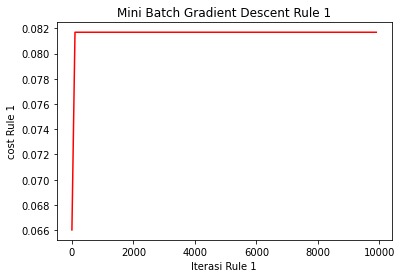

In [49]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Mini Batch Gradient Descent Rule 1")
plt.plot(mb_iterasi_rule1_list,mb_cost_rule1_list, color='red', label='Eror')
plt.show()

In [50]:
mb_cost_rule1

0.08168815185572254

In [51]:
mb_b0_rule1

0.21796318443749746

In [52]:
mb_bpoly_rule1 #hasil untuk x1 dan x2

array([-0.26011376,  0.10570888,  0.26797204, -0.22262734, -0.30741788])

In [53]:
data_rule_1

VA    CA   RS  chlorides   TSD  quality
3     0.28  0.56  1.9      0.075  60.0        6
7     0.65  0.00  1.2      0.065  21.0        7
8     0.58  0.02  2.0      0.073  18.0        7
20    0.22  0.48  1.8      0.077  60.0        6
24    0.40  0.14  2.4      0.085  40.0        6
...    ...   ...  ...        ...   ...      ...
1592  0.51  0.13  2.3      0.076  40.0        6
1593  0.62  0.08  1.9      0.068  38.0        6
1595  0.55  0.10  2.2      0.062  51.0        6
1596  0.51  0.13  2.3      0.076  40.0        6
1598  0.31  0.47  3.6      0.067  42.0        6

[737 rows x 6 columns]

In [54]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

array([[2.8e-01, 5.6e-01, 1.9e+00, 7.5e-02, 6.0e+01],
       [6.5e-01, 0.0e+00, 1.2e+00, 6.5e-02, 2.1e+01],
       [5.8e-01, 2.0e-02, 2.0e+00, 7.3e-02, 1.8e+01],
       ...,
       [5.5e-01, 1.0e-01, 2.2e+00, 6.2e-02, 5.1e+01],
       [5.1e-01, 1.3e-01, 2.3e+00, 7.6e-02, 4.0e+01],
       [3.1e-01, 4.7e-01, 3.6e+00, 6.7e-02, 4.2e+01]])

In [55]:
Y1=np.array(data_rule_1.iloc[:,2])  #mengambil angka dari kolom
Y1

array([1.9 , 1.2 , 2.  , 1.8 , 2.4 , 2.  , 2.5 , 5.5 , 2.4 , 2.1 , 2.2 ,
       2.1 , 2.8 , 2.4 , 1.9 , 1.9 , 1.9 , 1.8 , 1.9 , 2.1 , 1.9 , 1.9 ,
       2.5 , 2.3 , 2.2 , 1.9 , 2.  , 2.2 , 2.2 , 1.8 , 1.5 , 1.8 , 1.8 ,
       2.3 , 2.8 , 2.1 , 1.7 , 2.1 , 2.  , 2.  , 1.9 , 2.3 , 1.9 , 1.9 ,
       2.  , 1.4 , 1.6 , 2.6 , 2.6 , 2.1 , 2.  , 2.8 , 2.1 , 2.4 , 2.  ,
       2.  , 2.6 , 2.6 , 1.8 , 2.8 , 1.9 , 1.9 , 1.9 , 1.9 , 2.1 , 2.2 ,
       2.2 , 2.  , 1.7 , 2.  , 1.6 , 1.8 , 1.8 , 2.6 , 1.8 , 3.6 , 3.  ,
       4.  , 4.  , 4.  , 4.  , 3.  , 4.  , 6.4 , 5.6 , 3.6 , 5.6 , 2.  ,
       3.  , 2.5 , 2.5 , 2.7 , 2.4 , 3.2 , 2.6 , 1.5 , 2.5 , 2.4 , 2.4 ,
       1.7 , 2.5 , 2.5 , 3.2 , 3.2 , 2.8 , 3.65, 2.6 , 2.9 , 2.9 , 2.5 ,
       3.4 , 1.9 , 2.3 , 2.4 , 2.7 , 1.8 , 1.8 , 2.6 , 3.  , 2.8 , 2.7 ,
       2.95, 3.1 , 2.6 , 2.6 , 5.8 , 3.4 , 5.8 , 2.4 , 1.6 , 1.8 , 3.8 ,
       4.4 , 3.  , 2.4 , 6.2 , 2.5 , 2.  , 2.9 , 2.  , 2.  , 2.4 , 2.  ,
       1.9 , 1.9 , 2.5 , 2.9 , 2.6 , 2.6 , 1.7 , 2.

In [56]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1

VA    CA   RS  chlorides   TSD  quality  pred
3     0.28  0.56  1.9      0.075  60.0        6   1.9
7     0.65  0.00  1.2      0.065  21.0        7   1.2
8     0.58  0.02  2.0      0.073  18.0        7   2.0
20    0.22  0.48  1.8      0.077  60.0        6   1.8
24    0.40  0.14  2.4      0.085  40.0        6   2.4
...    ...   ...  ...        ...   ...      ...   ...
1592  0.51  0.13  2.3      0.076  40.0        6   2.3
1593  0.62  0.08  1.9      0.068  38.0        6   1.9
1595  0.55  0.10  2.2      0.062  51.0        6   2.2
1596  0.51  0.13  2.3      0.076  40.0        6   2.3
1598  0.31  0.47  3.6      0.067  42.0        6   3.6

[737 rows x 7 columns]

##Rule 2


In [63]:
# Rule 2
rule_2 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Terpenuhi maka Y Good"]
index=rule_2.index

data_rule_2=df_fuzz.iloc[index,:6]
data_rule_2

VA    CA   RS  chlorides   TSD  quality
0     0.700  0.00  1.9      0.076  34.0        5
4     0.700  0.00  1.9      0.076  34.0        5
5     0.660  0.00  1.8      0.075  40.0        5
6     0.600  0.06  1.6      0.069  59.0        5
10    0.580  0.08  1.8      0.097  65.0        5
...     ...   ...  ...        ...   ...      ...
1579  0.560  0.09  1.7      0.053  32.0        5
1581  0.560  0.09  1.7      0.053  32.0        5
1582  0.715  0.10  2.6      0.053  27.0        5
1594  0.600  0.08  2.0      0.090  44.0        5
1597  0.645  0.12  2.0      0.075  44.0        5

[472 rows x 6 columns]

In [64]:
data_rule_2.to_csv('hasilrule2.csv') 

###Mini Batch Gradient Descent

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [66]:
df_rule2=pd.read_csv('hasilrule2.csv',sep=',')
df_rule2

Unnamed: 0     VA    CA   RS  chlorides   TSD  quality
0             0  0.700  0.00  1.9      0.076  34.0        5
1             4  0.700  0.00  1.9      0.076  34.0        5
2             5  0.660  0.00  1.8      0.075  40.0        5
3             6  0.600  0.06  1.6      0.069  59.0        5
4            10  0.580  0.08  1.8      0.097  65.0        5
..          ...    ...   ...  ...        ...   ...      ...
467        1579  0.560  0.09  1.7      0.053  32.0        5
468        1581  0.560  0.09  1.7      0.053  32.0        5
469        1582  0.715  0.10  2.6      0.053  27.0        5
470        1594  0.600  0.08  2.0      0.090  44.0        5
471        1597  0.645  0.12  2.0      0.075  44.0        5

[472 rows x 7 columns]

In [67]:
df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
df_rule2

VA    CA   RS  chlorides   TSD  quality
0    0.700  0.00  1.9      0.076  34.0        5
1    0.700  0.00  1.9      0.076  34.0        5
2    0.660  0.00  1.8      0.075  40.0        5
3    0.600  0.06  1.6      0.069  59.0        5
4    0.580  0.08  1.8      0.097  65.0        5
..     ...   ...  ...        ...   ...      ...
467  0.560  0.09  1.7      0.053  32.0        5
468  0.560  0.09  1.7      0.053  32.0        5
469  0.715  0.10  2.6      0.053  27.0        5
470  0.600  0.08  2.0      0.090  44.0        5
471  0.645  0.12  2.0      0.075  44.0        5

[472 rows x 6 columns]

In [68]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('quality',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['quality'].values.reshape(rule_2.shape[0],1))

scaled_X2

array([[0.92035398, 0.        , 0.11764706, 0.22981366, 0.35443038],
       [0.92035398, 0.        , 0.11764706, 0.22981366, 0.35443038],
       [0.84955752, 0.        , 0.09803922, 0.22360248, 0.43037975],
       ...,
       [0.94690265, 0.13513514, 0.25490196, 0.08695652, 0.26582278],
       [0.74336283, 0.10810811, 0.1372549 , 0.31677019, 0.48101266],
       [0.82300885, 0.16216216, 0.1372549 , 0.22360248, 0.48101266]])

In [69]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 0.5, 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1.

In [70]:
def mini_batch_gradient_descent_rule2(X2, y2, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule2 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X2_smntr = X2[random_indices]
        y2_smntr = y2[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule2 = X2_smntr[j:j+batch_size]
            yj_rule2 = y2_smntr[j:j+batch_size]
            
            y2_pred = np.dot(bpoly_rule2, Xj_rule2.T) + b0_rule2           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule2_grad = -(2/len(Xj_rule2))*(Xj_rule2.T.dot(yj_rule2-y2_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule2_grad = -(2/len(Xj_rule2))*np.sum(yj_rule2-y2_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule2 in range(jumlah_variabel_rule2):
                bp_rule2=bpoly_rule2[jv_rule2]
                bp.append(bp_rule2)
            b_rule2=[b0_rule2]+bp
        
            cost_rule2 = np.mean(np.square(yj_rule2-y2_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [71]:
import time
mulai_rule2 = time.time()
mb_bpoly_rule2, mb_b0_rule2, mb_cost_rule2, mb_b_rule2_list, mb_cost_rule2_list, mb_iterasi_rule2_list=mini_batch_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

Waktu Komputasi Rule 2:  18.24174976348877


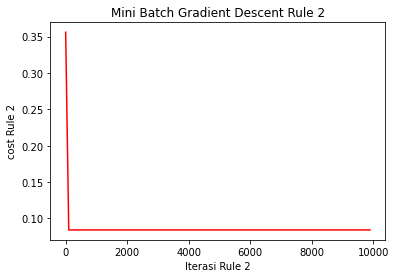

In [72]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(mb_iterasi_rule2_list,mb_cost_rule2_list, color='red', label='Eror')
plt.show()

In [73]:
mb_cost_rule2

0.08409756489577457

In [74]:
mb_b0_rule2

1.2128720107540332

In [75]:
mb_bpoly_rule2 #hasil untuk x1 dan x2

array([ 0.08967597, -0.09593886,  0.11736178, -0.11206545, -0.06319675])

In [76]:
data_rule_2

VA    CA   RS  chlorides   TSD  quality
0     0.700  0.00  1.9      0.076  34.0        5
4     0.700  0.00  1.9      0.076  34.0        5
5     0.660  0.00  1.8      0.075  40.0        5
6     0.600  0.06  1.6      0.069  59.0        5
10    0.580  0.08  1.8      0.097  65.0        5
...     ...   ...  ...        ...   ...      ...
1579  0.560  0.09  1.7      0.053  32.0        5
1581  0.560  0.09  1.7      0.053  32.0        5
1582  0.715  0.10  2.6      0.053  27.0        5
1594  0.600  0.08  2.0      0.090  44.0        5
1597  0.645  0.12  2.0      0.075  44.0        5

[472 rows x 6 columns]

In [77]:
X2=np.array(data_rule_2.iloc[::,:-1])
X2

array([[ 0.7  ,  0.   ,  1.9  ,  0.076, 34.   ],
       [ 0.7  ,  0.   ,  1.9  ,  0.076, 34.   ],
       [ 0.66 ,  0.   ,  1.8  ,  0.075, 40.   ],
       ...,
       [ 0.715,  0.1  ,  2.6  ,  0.053, 27.   ],
       [ 0.6  ,  0.08 ,  2.   ,  0.09 , 44.   ],
       [ 0.645,  0.12 ,  2.   ,  0.075, 44.   ]])

In [78]:
Y2=np.array(data_rule_2.iloc[:,2])
Y2

array([1.9 , 1.9 , 1.8 , 1.6 , 1.8 , 1.6 , 1.6 , 4.4 , 2.3 , 1.6 , 2.3 ,
       1.4 , 1.8 , 1.6 , 1.9 , 2.4 , 1.8 , 2.8 , 2.2 , 1.8 , 2.1 , 1.6 ,
       1.6 , 1.7 , 3.8 , 3.4 , 2.3 , 2.2 , 2.  , 4.65, 4.65, 1.5 , 1.6 ,
       2.  , 2.1 , 2.5 , 2.2 , 2.2 , 1.6 , 2.  , 2.2 , 1.9 , 1.8 , 1.9 ,
       2.  , 2.1 , 2.2 , 2.1 , 1.7 , 1.8 , 1.8 , 2.5 , 2.6 , 1.8 , 1.9 ,
       1.8 , 2.  , 1.9 , 1.8 , 1.7 , 2.2 , 1.3 , 1.6 , 2.  , 1.5 , 2.  ,
       2.4 , 2.4 , 2.5 , 1.8 , 2.  , 2.  , 2.6 , 2.2 , 2.2 , 2.4 , 1.5 ,
       1.6 , 2.2 , 2.  , 2.2 , 1.9 , 2.  , 1.5 , 2.  , 2.6 , 2.6 , 1.9 ,
       2.3 , 3.1 , 2.2 , 2.1 , 1.7 , 1.7 , 1.8 , 2.4 , 4.  , 2.4 , 3.  ,
       3.4 , 3.4 , 2.5 , 2.  , 2.3 , 2.1 , 2.6 , 1.6 , 2.2 , 2.6 , 2.3 ,
       4.5 , 2.  , 2.1 , 2.8 , 1.9 , 2.4 , 3.  , 2.  , 2.5 , 2.  , 2.6 ,
       2.8 , 2.2 , 2.1 , 2.  , 2.3 , 2.7 , 4.5 , 2.4 , 1.9 , 1.3 , 2.2 ,
       2.3 , 2.3 , 1.5 , 2.6 , 2.1 , 1.6 , 2.3 , 2.7 , 2.2 , 2.6 , 2.55,
       2.9 , 2.6 , 2.1 , 2.2 , 2.  , 2.2 , 2.2 , 2.

In [79]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, Y2) 
# Proses Training Model
poly_reg.fit(X2, Y2) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y2_pred=lin_reg_2.predict(poly_reg.fit_transform(X2))
y2_pred

data_rule_2['pred'] = y2_pred
data_rule_2

VA    CA   RS  chlorides   TSD  quality  pred
0     0.700  0.00  1.9      0.076  34.0        5   1.9
4     0.700  0.00  1.9      0.076  34.0        5   1.9
5     0.660  0.00  1.8      0.075  40.0        5   1.8
6     0.600  0.06  1.6      0.069  59.0        5   1.6
10    0.580  0.08  1.8      0.097  65.0        5   1.8
...     ...   ...  ...        ...   ...      ...   ...
1579  0.560  0.09  1.7      0.053  32.0        5   1.7
1581  0.560  0.09  1.7      0.053  32.0        5   1.7
1582  0.715  0.10  2.6      0.053  27.0        5   2.6
1594  0.600  0.08  2.0      0.090  44.0        5   2.0
1597  0.645  0.12  2.0      0.075  44.0        5   2.0

[472 rows x 7 columns]

##Rule 3

In [ ]:
# Rule 3
rule_3 = df_fuzz[df_fuzz['Rule']==" X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Cukup maka Y Good"]
index=rule_3.index

data_rule_3=df_fuzz.iloc[index,:6]
data_rule_3

In [ ]:
data_rule_2.to_csv('hasilrule3.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule3=pd.read_csv('hasilrule3.csv',sep=',')
df_rule3

In [ ]:
df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
df_rule3

In [ ]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('quality',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['quality'].values.reshape(rule_3.shape[0],1))

scaled_X3

In [ ]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

In [ ]:
def mini_batch_gradient_descent_rule3(X3, y3, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule3 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X3_smntr = X3[random_indices]
        y3_smntr = y3[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule3 = X3_smntr[j:j+batch_size]
            yj_rule3 = y3_smntr[j:j+batch_size]
            
            y3_pred = np.dot(bpoly_rule3, Xj_rule3.T) + b0_rule3           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule3_grad = -(2/len(Xj_rule3))*(Xj_rule3.T.dot(yj_rule3-y3_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule3_grad = -(2/len(Xj_rule3))*np.sum(yj_rule3-y3_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule3 in range(jumlah_variabel_rule3):
                bp_rule3=bpoly_rule3[jv_rule3]
                bp.append(bp_rule3)
            b_rule3=[b0_rule3]+bp
        
            cost_rule3 = np.mean(np.square(yj_rule3-y3_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [ ]:
import time
mulai_rule3 = time.time()
mb_bpoly_rule3, mb_b0_rule3, mb_cost_rule3, mb_b_rule3_list, mb_cost_rule3_list, mb_iterasi_rule3_list=mini_batch_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

In [ ]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Mini Batch Gradient Descent Rule 3")
plt.plot(mb_iterasi_rule3_list,mb_cost_rule3_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule3

In [ ]:
mb_b0_rule3

In [ ]:
mb_bpoly_rule3 #hasil untuk x1 dan x2

In [ ]:
data_rule_3

In [ ]:
X3=np.array(data_rule_3.iloc[::,:-1])
X3

In [ ]:
Y3=np.array(data_rule_3.iloc[:,2])
Y3

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X3_poly = poly_reg.fit_transform(X3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X3_poly, Y3) 
# Proses Training Model
poly_reg.fit(X3, Y3) 

# Memprediksi hasil dengan regresi polynomial
y3_pred=lin_reg_2.predict(poly_reg.fit_transform(X3))
y3_pred

data_rule_3['pred'] = y3_pred
data_rule_3

##Rule 4

In [ ]:
# Rule 4
rule_4 = df_fuzz[df_fuzz['Rule']==" X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Terpenuhi maka Y Good"]
index=rule_4.index
data_rule_4=df_fuzz.iloc[index,:6]
data_rule_4

In [ ]:
data_rule_4.to_csv('hasilrule4.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule4=pd.read_csv('hasilrule4.csv',sep=',')
df_rule4

In [ ]:
df_rule4=df_rule4.drop(columns=['Unnamed: 0'])
df_rule4

In [ ]:
from sklearn import preprocessing
sx4 = preprocessing.MinMaxScaler()
sy4 = preprocessing.MinMaxScaler()

scaled_X4 = sx4.fit_transform(data_rule_4.drop('quality',axis='columns'))
scaled_y4 = sy4.fit_transform(data_rule_4['quality'].values.reshape(rule_4.shape[0],1))

scaled_X4

In [ ]:
scaled_y4_reshape=scaled_y4.reshape(scaled_y4.shape[0],)
scaled_y4_reshape

In [ ]:
def mini_batch_gradient_descent_rule4(X4, y4, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule4 = X4.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule4 = np.ones(shape=(jumlah_variabel_rule4))       # b1, b2, ... b(jumlah variabel)
    b0_rule4 = 0                                         # b0 atau bias
    n = X4.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule4_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule4_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule4_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule4 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X4_smntr = X4[random_indices]
        y4_smntr = y4[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule4 = X4_smntr[j:j+batch_size]
            yj_rule4 = y4_smntr[j:j+batch_size]
            
            y4_pred = np.dot(bpoly_rule4, Xj_rule4.T) + b0_rule4           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule4_grad = -(2/len(Xj_rule4))*(Xj_rule4.T.dot(yj_rule4-y4_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule4_grad = -(2/len(Xj_rule4))*np.sum(yj_rule4-y4_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule4 = bpoly_rule4 - learning_rate * bpoly_rule4_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule4 = b0_rule4 - learning_rate * b0_rule4_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule4 in range(jumlah_variabel_rule4):
                bp_rule4=bpoly_rule4[jv_rule4]
                bp.append(bp_rule4)
            b_rule4=[b0_rule4]+bp
        
            cost_rule4 = np.mean(np.square(yj_rule4-y4_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule4_list.append(cost_rule4)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule4_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule4_list.append(b_rule4)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule4, b0_rule4, cost_rule4, b_rule4_list, cost_rule4_list, iterasi_rule4_list  # Output

In [ ]:
import time
mulai_rule4 = time.time()
mb_bpoly_rule4, mb_b0_rule4, mb_cost_rule4, mb_b_rule4_list, mb_cost_rule4_list, mb_iterasi_rule4_list=mini_batch_gradient_descent_rule4 (scaled_X4, 
                                                                                                                                        scaled_y4_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule4 = time.time()
waktu_komputasi_rule4 = (selesai_rule4 - mulai_rule4)
print("Waktu Komputasi Rule 4: ",waktu_komputasi_rule4)

In [ ]:
plt.xlabel("Iterasi Rule 4")
plt.ylabel("cost Rule 4")
plt.title("Mini Batch Gradient Descent Rule 4")
plt.plot(mb_iterasi_rule4_list,mb_cost_rule4_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule4

In [ ]:
mb_b0_rule4

In [ ]:
mb_bpoly_rule4 #hasil untuk x1 dan x2

In [ ]:
data_rule_4

In [ ]:
X4=np.array(data_rule_4.iloc[::,:-1])
X4

In [ ]:
Y4=np.array(data_rule_4.iloc[:,2])
Y4

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X4_poly = poly_reg.fit_transform(X4)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X4_poly, Y4) 
# Proses Training Model
poly_reg.fit(X4, Y4) 

# Memprediksi hasil dengan regresi polynomial
y4_pred=lin_reg_2.predict(poly_reg.fit_transform(X4))
y4_pred

data_rule_4['pred'] = y4_pred
data_rule_4

##Rule 5

In [ ]:
#Rule 5
rule_5 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Cukup maka Y Bad"]
index=rule_5.index
data_rule_5=df_fuzz.iloc[index,:6]
data_rule_5

In [ ]:
data_rule_5.to_csv('hasilrule5.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule5=pd.read_csv('hasilrule5.csv',sep=',')
df_rule5

In [ ]:
df_rule5=df_rule5.drop(columns=['Unnamed: 0'])
df_rule5

In [ ]:
from sklearn import preprocessing
sx5 = preprocessing.MinMaxScaler()
sy5 = preprocessing.MinMaxScaler()

scaled_X5 = sx5.fit_transform(data_rule_5.drop('quality',axis='columns'))
scaled_y5 = sy5.fit_transform(data_rule_5['quality'].values.reshape(rule_5.shape[0],1))

scaled_X5

In [ ]:
scaled_y5_reshape=scaled_y5.reshape(scaled_y5.shape[0],)
scaled_y5_reshape

In [ ]:
def mini_batch_gradient_descent_rule5(X5, y5, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule5 = X5.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule5 = np.ones(shape=(jumlah_variabel_rule5))       # b1, b2, ... b(jumlah variabel)
    b0_rule5 = 0                                         # b0 atau bias
    n = X5.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule5_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule5_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule5_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule5 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X5_smntr = X5[random_indices]
        y5_smntr = y5[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule5 = X5_smntr[j:j+batch_size]
            yj_rule5 = y5_smntr[j:j+batch_size]
            
            y5_pred = np.dot(bpoly_rule5, Xj_rule5.T) + b0_rule5          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule5_grad = -(2/len(Xj_rule5))*(Xj_rule5.T.dot(yj_rule5-y5_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule5_grad = -(2/len(Xj_rule5))*np.sum(yj_rule5-y5_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule5 = bpoly_rule5 - learning_rate * bpoly_rule5_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule5 = b0_rule5 - learning_rate * b0_rule5_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule5 in range(jumlah_variabel_rule5):
                bp_rule5=bpoly_rule5[jv_rule5]
                bp.append(bp_rule5)
            b_rule5=[b0_rule5]+bp
        
            cost_rule5 = np.mean(np.square(yj_rule5-y5_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule5_list.append(cost_rule5)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule5_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule5_list.append(b_rule5)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule5, b0_rule5, cost_rule5, b_rule5_list, cost_rule5_list, iterasi_rule5_list  # Output

In [ ]:
import time
mulai_rule5 = time.time()
mb_bpoly_rule5, mb_b0_rule5, mb_cost_rule5, mb_b_rule5_list, mb_cost_rule5_list, mb_iterasi_rule5_list=mini_batch_gradient_descent_rule5 (scaled_X5, 
                                                                                                                                        scaled_y5_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule5 = time.time()
waktu_komputasi_rule5 = (selesai_rule5 - mulai_rule5)
print("Waktu Komputasi Rule 5: ",waktu_komputasi_rule5)

In [ ]:
plt.xlabel("Iterasi Rule 5")
plt.ylabel("cost Rule 5")
plt.title("Mini Batch Gradient Descent Rule 5")
plt.plot(mb_iterasi_rule5_list,mb_cost_rule5_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule5

In [ ]:
mb_b0_rule5

In [ ]:
mb_bpoly_rule5 #hasil untuk x1 dan x2

In [ ]:
data_rule_5

In [ ]:
X5=np.array(data_rule_5.iloc[::,:-1])
X5

In [ ]:
Y5=np.array(data_rule_5.iloc[:,2])
Y5

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X5_poly = poly_reg.fit_transform(X5)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X5_poly, Y5) 
# Proses Training Model
poly_reg.fit(X5, Y5) 

# Memprediksi hasil dengan regresi polynomial
y5_pred=lin_reg_2.predict(poly_reg.fit_transform(X5))
y5_pred

data_rule_5['pred'] = y5_pred
data_rule_5

##Rule 6

In [ ]:
#Rule 6
rule_6 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Terpenuhi maka Y Bad"]
index=rule_6.index
data_rule_6=df_fuzz.iloc[index,:6]
data_rule_6

In [ ]:
data_rule_6.to_csv('hasilrule6.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule6=pd.read_csv('hasilrule6.csv',sep=',')
df_rule6

In [ ]:
df_rule6=df_rule6.drop(columns=['Unnamed: 0'])
df_rule6

In [ ]:
from sklearn import preprocessing
sx6 = preprocessing.MinMaxScaler()
sy6 = preprocessing.MinMaxScaler()

scaled_X6 = sx6.fit_transform(data_rule_6.drop('quality',axis='columns'))
scaled_y6 = sy6.fit_transform(data_rule_6['quality'].values.reshape(rule_6.shape[0],1))

scaled_X6

In [ ]:
scaled_y6_reshape=scaled_y6.reshape(scaled_y6.shape[0],)
scaled_y6_reshape

In [ ]:
def mini_batch_gradient_descent_rule6(X6, y6, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule6 = X6.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule6 = np.ones(shape=(jumlah_variabel_rule6))       # b1, b2, ... b(jumlah variabel)
    b0_rule6 = 0                                         # b0 atau bias
    n = X6.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule6_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule6_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule6_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule6 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X6_smntr = X6[random_indices]
        y6_smntr = y6[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule6 = X6_smntr[j:j+batch_size]
            yj_rule6 = y6_smntr[j:j+batch_size]
            
            y6_pred = np.dot(bpoly_rule6, Xj_rule6.T) + b0_rule6          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule6_grad = -(2/len(Xj_rule6))*(Xj_rule6.T.dot(yj_rule6-y6_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule6_grad = -(2/len(Xj_rule6))*np.sum(yj_rule6-y6_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule6 = bpoly_rule6 - learning_rate * bpoly_rule6_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule6 = b0_rule6 - learning_rate * b0_rule6_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule6 in range(jumlah_variabel_rule6):
                bp_rule6=bpoly_rule6[jv_rule6]
                bp.append(bp_rule6)
            b_rule6=[b0_rule6]+bp
        
            cost_rule6 = np.mean(np.square(yj_rule6-y6_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule6_list.append(cost_rule6)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule6_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule6_list.append(b_rule6)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule6, b0_rule6, cost_rule6, b_rule6_list, cost_rule6_list, iterasi_rule6_list  # Output

In [ ]:
import time
mulai_rule6 = time.time()
mb_bpoly_rule6, mb_b0_rule6, mb_cost_rule6, mb_b_rule6_list, mb_cost_rule6_list, mb_iterasi_rule6_list=mini_batch_gradient_descent_rule6 (scaled_X6, 
                                                                                                                                        scaled_y6_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule6 = time.time()
waktu_komputasi_rule6 = (selesai_rule6 - mulai_rule6)
print("Waktu Komputasi Rule 6: ",waktu_komputasi_rule6)

In [ ]:
plt.xlabel("Iterasi Rule 6")
plt.ylabel("cost Rule 6")
plt.title("Mini Batch Gradient Descent Rule 6")
plt.plot(mb_iterasi_rule6_list,mb_cost_rule6_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule6

In [ ]:
mb_b0_rule6

In [ ]:
mb_bpoly_rule6 #hasil untuk x1 dan x2

In [ ]:
data_rule_6

In [ ]:
X6=np.array(data_rule_6.iloc[::,:-1])
X6

In [ ]:
Y6=np.array(data_rule_6.iloc[:,2])
Y6

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X6_poly = poly_reg.fit_transform(X6)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X6_poly, Y6) 
# Proses Training Model
poly_reg.fit(X6, Y6) 

# Memprediksi hasil dengan regresi polynomial
y6_pred=lin_reg_2.predict(poly_reg.fit_transform(X6))
y6_pred

data_rule_6['pred'] = y6_pred
data_rule_6

##Rule 7

In [ ]:
#Rule 7
rule_7 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Cukup maka Y Good"]
index=rule_7.index
data_rule_7=df_fuzz.iloc[index,:6]
data_rule_7

In [ ]:
data_rule_7.to_csv('hasilrule7.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule7=pd.read_csv('hasilrule7.csv',sep=',')
df_rule7

In [ ]:
df_rule7=df_rule7.drop(columns=['Unnamed: 0'])
df_rule7

In [ ]:
from sklearn import preprocessing
sx7 = preprocessing.MinMaxScaler()
sy7 = preprocessing.MinMaxScaler()

scaled_X7 = sx7.fit_transform(data_rule_7.drop('quality',axis='columns'))
scaled_y7 = sy7.fit_transform(data_rule_7['quality'].values.reshape(rule_7.shape[0],1))

scaled_X7

In [ ]:
scaled_y7_reshape=scaled_y7.reshape(scaled_y7.shape[0],)
scaled_y7_reshape

In [ ]:
def mini_batch_gradient_descent_rule7(X7, y7, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule7 = X7.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule7 = np.ones(shape=(jumlah_variabel_rule7))       # b1, b2, ... b(jumlah variabel)
    b0_rule7 = 0                                         # b0 atau bias
    n = X7.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule7_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule7_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule7_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule7 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X7_smntr = X7[random_indices]
        y7_smntr = y7[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule7 = X7_smntr[j:j+batch_size]
            yj_rule7 = y7_smntr[j:j+batch_size]
            
            y7_pred = np.dot(bpoly_rule7, Xj_rule7.T) + b0_rule7          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule7_grad = -(2/len(Xj_rule7))*(Xj_rule7.T.dot(yj_rule7-y7_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule7_grad = -(2/len(Xj_rule7))*np.sum(yj_rule7-y7_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule7 = bpoly_rule7 - learning_rate * bpoly_rule7_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule7 = b0_rule7 - learning_rate * b0_rule7_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule7 in range(jumlah_variabel_rule7):
                bp_rule7=bpoly_rule7[jv_rule7]
                bp.append(bp_rule7)
            b_rule7=[b0_rule7]+bp
        
            cost_rule7 = np.mean(np.square(yj_rule7-y7_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule7_list.append(cost_rule7)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule7_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule7_list.append(b_rule7)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule7, b0_rule7, cost_rule7, b_rule7_list, cost_rule7_list, iterasi_rule7_list  # Output

In [ ]:
import time
mulai_rule7 = time.time()
mb_bpoly_rule7, mb_b0_rule7, mb_cost_rule7, mb_b_rule7_list, mb_cost_rule7_list, mb_iterasi_rule7_list=mini_batch_gradient_descent_rule7 (scaled_X7, 
                                                                                                                                        scaled_y7_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule7 = time.time()
waktu_komputasi_rule7 = (selesai_rule7 - mulai_rule7)
print("Waktu Komputasi Rule 7: ",waktu_komputasi_rule7)

In [ ]:
plt.xlabel("Iterasi Rule 7")
plt.ylabel("cost Rule 7")
plt.title("Mini Batch Gradient Descent Rule 7")
plt.plot(mb_iterasi_rule7_list,mb_cost_rule7_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule7

In [ ]:
mb_b0_rule7

In [ ]:
mb_bpoly_rule7

In [ ]:
data_rule_7

In [ ]:
X7=np.array(data_rule_7.iloc[::,:-1])
X7

In [ ]:
Y7=np.array(data_rule_7.iloc[:,2])
Y7

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X7_poly = poly_reg.fit_transform(X7)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X7_poly, Y7) 
# Proses Training Model
poly_reg.fit(X7, Y7) 

# Memprediksi hasil dengan regresi polynomial
y7_pred=lin_reg_2.predict(poly_reg.fit_transform(X7))
y7_pred

data_rule_7['pred'] = y7_pred
data_rule_7

##Rule 8

In [ ]:
#Rule 8
rule_8 = df_fuzz[df_fuzz['Rule']=="  Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Kurang dan X5 Terpenuhi maka Y Good"]
index=rule_8.index
data_rule_8=df_fuzz.iloc[index,:6]
data_rule_8

In [ ]:
data_rule_8.to_csv('hasilrule8.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule8=pd.read_csv('hasilrule8.csv',sep=',')
df_rule8

In [ ]:
df_rule8=df_rule8.drop(columns=['Unnamed: 0'])
df_rule8

In [ ]:
from sklearn import preprocessing
sx8 = preprocessing.MinMaxScaler()
sy8 = preprocessing.MinMaxScaler()

scaled_X8 = sx8.fit_transform(data_rule_8.drop('quality',axis='columns'))
scaled_y8 = sy8.fit_transform(data_rule_8['quality'].values.reshape(rule_8.shape[0],1))

scaled_X8

In [ ]:
scaled_y8_reshape=scaled_y8.reshape(scaled_y8.shape[0],)
scaled_y8_reshape

In [ ]:
def mini_batch_gradient_descent_rule8(X8, y8, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule8 = X8.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule8 = np.ones(shape=(jumlah_variabel_rule8))       # b1, b2, ... b(jumlah variabel)
    b0_rule8 = 0                                         # b0 atau bias
    n = X8.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule8_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule8_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule8_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule8 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X8_smntr = X8[random_indices]
        y8_smntr = y8[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule8 = X8_smntr[j:j+batch_size]
            yj_rule8 = y8_smntr[j:j+batch_size]
            
            y8_pred = np.dot(bpoly_rule8, Xj_rule8.T) + b0_rule8          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule8_grad = -(2/len(Xj_rule8))*(Xj_rule8.T.dot(yj_rule8-y8_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule8_grad = -(2/len(Xj_rule8))*np.sum(yj_rule8-y8_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule8 = bpoly_rule8 - learning_rate * bpoly_rule8_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule8 = b0_rule8 - learning_rate * b0_rule8_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule8 in range(jumlah_variabel_rule8):
                bp_rule8=bpoly_rule8[jv_rule8]
                bp.append(bp_rule8)
            b_rule8=[b0_rule8]+bp
        
            cost_rule8 = np.mean(np.square(yj_rule8-y8_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule8_list.append(cost_rule8)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule8_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule8_list.append(b_rule8)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule8, b0_rule8, cost_rule8, b_rule8_list, cost_rule8_list, iterasi_rule8_list  # Output

In [ ]:
import time
mulai_rule8 = time.time()
mb_bpoly_rule8, mb_b0_rule8, mb_cost_rule8, mb_b_rule8_list, mb_cost_rule8_list, mb_iterasi_rule8_list=mini_batch_gradient_descent_rule8 (scaled_X8, 
                                                                                                                                        scaled_y8_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule8 = time.time()
waktu_komputasi_rule8 = (selesai_rule8 - mulai_rule8)
print("Waktu Komputasi Rule 8: ",waktu_komputasi_rule8)

In [ ]:
plt.xlabel("Iterasi Rule 8")
plt.ylabel("cost Rule 8")
plt.title("Mini Batch Gradient Descent Rule 8")
plt.plot(mb_iterasi_rule8_list,mb_cost_rule8_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule8

In [ ]:
mb_b0_rule8

In [ ]:
mb_bpoly_rule8

In [ ]:
data_rule_8

In [ ]:
X8=np.array(data_rule_8.iloc[::,:-1])
X8

In [ ]:
Y8=np.array(data_rule_8.iloc[:,2])
Y8

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X8_poly = poly_reg.fit_transform(X8)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X8_poly, Y8) 
# Proses Training Model
poly_reg.fit(X8, Y8) 

# Memprediksi hasil dengan regresi polynomial
y8_pred=lin_reg_2.predict(poly_reg.fit_transform(X8))
y8_pred

data_rule_8['pred'] = y8_pred
data_rule_8

##Rule 9

In [ ]:
#Rule 9
rule_9 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih dan X5 Terpenuhi maka Y Bad"]
index=rule_9.index
data_rule_9=df_fuzz.iloc[index,:6]
data_rule_9

In [ ]:
data_rule_9.to_csv('hasilrule9.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule9=pd.read_csv('hasilrule9.csv',sep=',')
df_rule9

In [ ]:
df_rule9=df_rule9.drop(columns=['Unnamed: 0'])
df_rule9

In [ ]:
from sklearn import preprocessing
sx9 = preprocessing.MinMaxScaler()
sy9 = preprocessing.MinMaxScaler()

scaled_X9 = sx9.fit_transform(data_rule_9.drop('quality',axis='columns'))
scaled_y9 = sy9.fit_transform(data_rule_9['quality'].values.reshape(rule_9.shape[0],1))

scaled_X9

In [ ]:
scaled_y9_reshape=scaled_y9.reshape(scaled_y9.shape[0],)
scaled_y9_reshape

In [ ]:
def mini_batch_gradient_descent_rule9(X9, y9, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule9 = X9.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule9 = np.ones(shape=(jumlah_variabel_rule9))       # b1, b2, ... b(jumlah variabel)
    b0_rule9 = 0                                         # b0 atau bias
    n = X9.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule9_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule9_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule9_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule9 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X9_smntr = X9[random_indices]
        y9_smntr = y9[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule9 = X9_smntr[j:j+batch_size]
            yj_rule9 = y9_smntr[j:j+batch_size]
            
            y9_pred = np.dot(bpoly_rule9, Xj_rule9.T) + b0_rule9          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule9_grad = -(2/len(Xj_rule9))*(Xj_rule9.T.dot(yj_rule9-y9_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule9_grad = -(2/len(Xj_rule9))*np.sum(yj_rule9-y9_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule9 = bpoly_rule9 - learning_rate * bpoly_rule9_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule9 = b0_rule9 - learning_rate * b0_rule9_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule9 in range(jumlah_variabel_rule9):
                bp_rule9=bpoly_rule9[jv_rule9]
                bp.append(bp_rule9)
            b_rule9=[b0_rule9]+bp
        
            cost_rule9 = np.mean(np.square(yj_rule9-y9_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule9_list.append(cost_rule9)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule9_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule9_list.append(b_rule9)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule9, b0_rule9, cost_rule9, b_rule9_list, cost_rule9_list, iterasi_rule9_list  # Output

In [ ]:
import time
mulai_rule9 = time.time()
mb_bpoly_rule9, mb_b0_rule9, mb_cost_rule9, mb_b_rule9_list, mb_cost_rule9_list, mb_iterasi_rule9_list=mini_batch_gradient_descent_rule9 (scaled_X9, 
                                                                                                                                        scaled_y9_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule9 = time.time()
waktu_komputasi_rule9 = (selesai_rule9 - mulai_rule9)
print("Waktu Komputasi Rule 9: ",waktu_komputasi_rule9)

In [ ]:
plt.xlabel("Iterasi Rule 9")
plt.ylabel("cost Rule 9")
plt.title("Mini Batch Gradient Descent Rule 9")
plt.plot(mb_iterasi_rule9_list,mb_cost_rule9_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule9

In [ ]:
mb_b0_rule9

In [ ]:
mb_bpoly_rule9

In [ ]:
data_rule_9

In [ ]:
X9=np.array(data_rule_9.iloc[::,:-1])
X9

In [ ]:
Y9=np.array(data_rule_9.iloc[:,2])
Y9

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X9_poly = poly_reg.fit_transform(X9)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X9_poly, Y9) 
# Proses Training Model
poly_reg.fit(X9, Y9) 

# Memprediksi hasil dengan regresi polynomial
y9_pred=lin_reg_2.predict(poly_reg.fit_transform(X9))
y9_pred

data_rule_9['pred'] = y9_pred
data_rule_9

##Rule 10

In [ ]:
#Rule 10
rule_10 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Kurang dan X5 Terpenuhi maka Y Bad"]
index=rule_10.index
data_rule_10=df_fuzz.iloc[index,:6]
data_rule_10

In [ ]:
data_rule_10.to_csv('hasilrule10.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule10=pd.read_csv('hasilrule10.csv',sep=',')
df_rule10

In [ ]:
df_rule10=df_rule10.drop(columns=['Unnamed: 0'])
df_rule10

In [ ]:
from sklearn import preprocessing
sx10 = preprocessing.MinMaxScaler()
sy10 = preprocessing.MinMaxScaler()

scaled_X10 = sx10.fit_transform(data_rule_10.drop('quality',axis='columns'))
scaled_y10 = sy10.fit_transform(data_rule_10['quality'].values.reshape(rule_10.shape[0],1))

scaled_X10

In [ ]:
scaled_y10_reshape=scaled_y10.reshape(scaled_y10.shape[0],)
scaled_y10_reshape

In [ ]:
def mini_batch_gradient_descent_rule10(X10, y10, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule10 = X10.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule10 = np.ones(shape=(jumlah_variabel_rule10))       # b1, b2, ... b(jumlah variabel)
    b0_rule10 = 0                                         # b0 atau bias
    n = X10.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule10_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule10_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule10_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule10 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X10_smntr = X10[random_indices]
        y10_smntr = y10[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule10 = X10_smntr[j:j+batch_size]
            yj_rule10 = y10_smntr[j:j+batch_size]
            
            y10_pred = np.dot(bpoly_rule10, Xj_rule10.T) + b0_rule10          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule10_grad = -(2/len(Xj_rule10))*(Xj_rule10.T.dot(yj_rule10-y10_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule10_grad = -(2/len(Xj_rule10))*np.sum(yj_rule10-y10_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule10 = bpoly_rule10 - learning_rate * bpoly_rule10_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule10 = b0_rule10 - learning_rate * b0_rule10_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule10 in range(jumlah_variabel_rule10):
                bp_rule10=bpoly_rule10[jv_rule10]
                bp.append(bp_rule10)
            b_rule10=[b0_rule10]+bp
        
            cost_rule10 = np.mean(np.square(yj_rule10-y10_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule10_list.append(cost_rule10)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule10_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule10_list.append(b_rule10)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule10, b0_rule10, cost_rule10, b_rule10_list, cost_rule10_list, iterasi_rule10_list  # Output

In [ ]:
import time
mulai_rule10 = time.time()
mb_bpoly_rule10, mb_b0_rule10, mb_cost_rule10, mb_b_rule10_list, mb_cost_rule10_list, mb_iterasi_rule10_list=mini_batch_gradient_descent_rule10 (scaled_X10, 
                                                                                                                                        scaled_y10_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule10 = time.time()
waktu_komputasi_rule10 = (selesai_rule10 - mulai_rule10)
print("Waktu Komputasi Rule 10: ",waktu_komputasi_rule10)

In [ ]:
plt.xlabel("Iterasi Rule 10")
plt.ylabel("cost Rule 10")
plt.title("Mini Batch Gradient Descent Rule 10")
plt.plot(mb_iterasi_rule10_list,mb_cost_rule10_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule10

In [ ]:
mb_b0_rule10

In [ ]:
mb_bpoly_rule10

In [ ]:
data_rule_10

In [ ]:
X10=np.array(data_rule_10.iloc[::,:-1])
X10

In [ ]:
Y10=np.array(data_rule_10.iloc[:,2])
Y10

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X10_poly = poly_reg.fit_transform(X10)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X10_poly, Y10) 
# Proses Training Model
poly_reg.fit(X10, Y10) 

# Memprediksi hasil dengan regresi polynomial
y10_pred=lin_reg_2.predict(poly_reg.fit_transform(X10))
y10_pred

data_rule_10['pred'] = y10_pred
data_rule_10

##Rule 11

In [ ]:
#Rule 11
rule_11 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih dan X5 Cukup maka Y Bad"]
index=rule_11.index
data_rule_11=df_fuzz.iloc[index,:6]
data_rule_11

In [ ]:
data_rule_11.to_csv('hasilrule11.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule11=pd.read_csv('hasilrule11.csv',sep=',')
df_rule11

In [ ]:
df_rule11=df_rule11.drop(columns=['Unnamed: 0'])
df_rule11

In [ ]:
from sklearn import preprocessing
sx11 = preprocessing.MinMaxScaler()
sy11 = preprocessing.MinMaxScaler()

scaled_X11 = sx11.fit_transform(data_rule_11.drop('quality',axis='columns'))
scaled_y11 = sy11.fit_transform(data_rule_11['quality'].values.reshape(rule_11.shape[0],1))

scaled_X11

In [ ]:
scaled_y11_reshape=scaled_y11.reshape(scaled_y11.shape[0],)
scaled_y11_reshape

In [ ]:
def mini_batch_gradient_descent_rule11(X11, y11, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule11 = X11.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule11 = np.ones(shape=(jumlah_variabel_rule11))       # b1, b2, ... b(jumlah variabel)
    b0_rule11 = 0                                         # b0 atau bias
    n = X11.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule11_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule11_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule11_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule11 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X11_smntr = X11[random_indices]
        y11_smntr = y11[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule11 = X11_smntr[j:j+batch_size]
            yj_rule11 = y11_smntr[j:j+batch_size]
            
            y11_pred = np.dot(bpoly_rule11, Xj_rule11.T) + b0_rule11          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule11_grad = -(2/len(Xj_rule11))*(Xj_rule11.T.dot(yj_rule11-y11_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule11_grad = -(2/len(Xj_rule11))*np.sum(yj_rule11-y11_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule11 = bpoly_rule11 - learning_rate * bpoly_rule11_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule11 = b0_rule11 - learning_rate * b0_rule11_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule11 in range(jumlah_variabel_rule11):
                bp_rule11=bpoly_rule11[jv_rule11]
                bp.append(bp_rule11)
            b_rule11=[b0_rule11]+bp
        
            cost_rule11 = np.mean(np.square(yj_rule11-y11_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule11_list.append(cost_rule11)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule11_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule11_list.append(b_rule11)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule11, b0_rule11, cost_rule11, b_rule11_list, cost_rule11_list, iterasi_rule11_list  # Output

In [ ]:
import time
mulai_rule11 = time.time()
mb_bpoly_rule11, mb_b0_rule11, mb_cost_rule11, mb_b_rule11_list, mb_cost_rule11_list, mb_iterasi_rule11_list=mini_batch_gradient_descent_rule11 (scaled_X11, 
                                                                                                                                        scaled_y11_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule11 = time.time()
waktu_komputasi_rule11 = (selesai_rule11 - mulai_rule11)
print("Waktu Komputasi Rule 11: ",waktu_komputasi_rule11)

In [ ]:
plt.xlabel("Iterasi Rule 11")
plt.ylabel("cost Rule 11")
plt.title("Mini Batch Gradient Descent Rule 11")
plt.plot(mb_iterasi_rule11_list,mb_cost_rule11_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule11

In [ ]:
mb_b0_rule11

In [ ]:
mb_bpoly_rule11

In [ ]:
data_rule_11

In [ ]:
X11=np.array(data_rule_11.iloc[::,:-1])
X11

In [ ]:
Y11=np.array(data_rule_11.iloc[:,2])
Y11

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X11_poly = poly_reg.fit_transform(X11)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X11_poly, Y11) 
# Proses Training Model
poly_reg.fit(X11, Y11) 

# Memprediksi hasil dengan regresi polynomial
y11_pred=lin_reg_2.predict(poly_reg.fit_transform(X11))
y11_pred

data_rule_11['pred'] = y11_pred
data_rule_11

##Rule 12

In [ ]:
#Rule 12
rule_12 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih dan X5 Cukup maka Y Bad"]
index=rule_12.index
data_rule_12=df_fuzz.iloc[index,:6]
data_rule_12

In [ ]:
data_rule_12.to_csv('hasilrule12.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule12=pd.read_csv('hasilrule12.csv',sep=',')
df_rule12

In [ ]:
df_rule12=df_rule12.drop(columns=['Unnamed: 0'])
df_rule12

In [ ]:
from sklearn import preprocessing
sx12 = preprocessing.MinMaxScaler()
sy12 = preprocessing.MinMaxScaler()

scaled_X12 = sx12.fit_transform(data_rule_12.drop('quality',axis='columns'))
scaled_y12 = sy12.fit_transform(data_rule_12['quality'].values.reshape(rule_12.shape[0],1))

scaled_X12

In [ ]:
scaled_y12_reshape=scaled_y12.reshape(scaled_y12.shape[0],)
scaled_y12_reshape

In [ ]:
def mini_batch_gradient_descent_rule12(X12, y12, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule12 = X12.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule12 = np.ones(shape=(jumlah_variabel_rule12))       # b1, b2, ... b(jumlah variabel)
    b0_rule12 = 0                                         # b0 atau bias
    n = X12.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule12_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule12_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule12_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule12 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X12_smntr = X12[random_indices]
        y12_smntr = y12[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule12 = X12_smntr[j:j+batch_size]
            yj_rule12 = y12_smntr[j:j+batch_size]
            
            y12_pred = np.dot(bpoly_rule12, Xj_rule12.T) + b0_rule12          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule12_grad = -(2/len(Xj_rule12))*(Xj_rule12.T.dot(yj_rule12-y12_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule12_grad = -(2/len(Xj_rule12))*np.sum(yj_rule12-y12_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule12 = bpoly_rule12 - learning_rate * bpoly_rule12_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule12 = b0_rule12 - learning_rate * b0_rule12_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule12 in range(jumlah_variabel_rule12):
                bp_rule12=bpoly_rule12[jv_rule12]
                bp.append(bp_rule12)
            b_rule12=[b0_rule12]+bp
        
            cost_rule12 = np.mean(np.square(yj_rule12-y12_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule12_list.append(cost_rule12)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule12_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule12_list.append(b_rule12)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule12, b0_rule12, cost_rule12, b_rule12_list, cost_rule12_list, iterasi_rule12_list  # Output

In [ ]:
import time
mulai_rule12 = time.time()
mb_bpoly_rule12, mb_b0_rule12, mb_cost_rule12, mb_b_rule12_list, mb_cost_rule12_list, mb_iterasi_rule12_list=mini_batch_gradient_descent_rule12 (scaled_X12, 
                                                                                                                                        scaled_y12_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule12 = time.time()
waktu_komputasi_rule12 = (selesai_rule12 - mulai_rule12)
print("Waktu Komputasi Rule 12: ",waktu_komputasi_rule12)

In [ ]:
plt.xlabel("Iterasi Rule 12")
plt.ylabel("cost Rule 12")
plt.title("Mini Batch Gradient Descent Rule 12")
plt.plot(mb_iterasi_rule12_list,mb_cost_rule12_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule12

In [ ]:
mb_b0_rule12

In [ ]:
mb_bpoly_rule12

In [ ]:
data_rule_12

In [ ]:
X12=np.array(data_rule_12.iloc[::,:-1])
X12

In [ ]:
Y12=np.array(data_rule_12.iloc[:,2])
Y12

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X12_poly = poly_reg.fit_transform(X12)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X12_poly, Y12) 
# Proses Training Model
poly_reg.fit(X12, Y12) 

# Memprediksi hasil dengan regresi polynomial
y12_pred=lin_reg_2.predict(poly_reg.fit_transform(X12))
y12_pred

data_rule_12['pred'] = y12_pred
data_rule_12

##Rule 13

In [ ]:
#Rule 13
rule_13 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih dan X5 Terpenuhi maka Y Good"]
index=rule_13.index
data_rule_13=df_fuzz.iloc[index,:6]
data_rule_13

In [ ]:
data_rule_13.to_csv('hasilrule13.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule13=pd.read_csv('hasilrule13.csv',sep=',')
df_rule13

In [ ]:
df_rule13=df_rule13.drop(columns=['Unnamed: 0'])
df_rule13

In [ ]:
from sklearn import preprocessing
sx13 = preprocessing.MinMaxScaler()
sy13 = preprocessing.MinMaxScaler()

scaled_X13 = sx13.fit_transform(data_rule_13.drop('quality',axis='columns'))
scaled_y13 = sy13.fit_transform(data_rule_13['quality'].values.reshape(rule_13.shape[0],1))

scaled_X13

In [ ]:
scaled_y13_reshape=scaled_y13.reshape(scaled_y13.shape[0],)
scaled_y13_reshape

In [ ]:
def mini_batch_gradient_descent_rule13(X13, y13, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule13 = X13.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule13 = np.ones(shape=(jumlah_variabel_rule13))       # b1, b2, ... b(jumlah variabel)
    b0_rule13 = 0                                         # b0 atau bias
    n = X13.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule13_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule13_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule13_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule13 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X13_smntr = X13[random_indices]
        y13_smntr = y13[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule13 = X13_smntr[j:j+batch_size]
            yj_rule13 = y13_smntr[j:j+batch_size]
            
            y13_pred = np.dot(bpoly_rule13, Xj_rule13.T) + b0_rule13          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule13_grad = -(2/len(Xj_rule13))*(Xj_rule13.T.dot(yj_rule13-y13_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule13_grad = -(2/len(Xj_rule13))*np.sum(yj_rule13-y13_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule13 = bpoly_rule13 - learning_rate * bpoly_rule13_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule13 = b0_rule13 - learning_rate * b0_rule13_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule13 in range(jumlah_variabel_rule13):
                bp_rule13=bpoly_rule13[jv_rule13]
                bp.append(bp_rule13)
            b_rule13=[b0_rule13]+bp
        
            cost_rule13 = np.mean(np.square(yj_rule13-y13_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule13_list.append(cost_rule13)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule13_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule13_list.append(b_rule13)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule13, b0_rule13, cost_rule13, b_rule13_list, cost_rule13_list, iterasi_rule13_list  # Output

In [ ]:
import time
mulai_rule13 = time.time()
mb_bpoly_rule13, mb_b0_rule13, mb_cost_rule13, mb_b_rule13_list, mb_cost_rule13_list, mb_iterasi_rule13_list=mini_batch_gradient_descent_rule13 (scaled_X13, 
                                                                                                                                        scaled_y13_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule13 = time.time()
waktu_komputasi_rule13 = (selesai_rule13 - mulai_rule13)
print("Waktu Komputasi Rule 13: ",waktu_komputasi_rule13)

In [ ]:
plt.xlabel("Iterasi Rule 13")
plt.ylabel("cost Rule 13")
plt.title("Mini Batch Gradient Descent Rule 13")
plt.plot(mb_iterasi_rule13_list,mb_cost_rule13_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule13

In [ ]:
mb_b0_rule13

In [ ]:
mb_bpoly_rule13

In [ ]:
data_rule_13

In [ ]:
X13=np.array(data_rule_13.iloc[::,:-1])
X13

In [ ]:
Y13=np.array(data_rule_13.iloc[:,2])
Y13

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X13_poly = poly_reg.fit_transform(X13)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X13_poly, Y13) 
# Proses Training Model
poly_reg.fit(X13, Y13) 

# Memprediksi hasil dengan regresi polynomial
y13_pred=lin_reg_2.predict(poly_reg.fit_transform(X13))
y13_pred

data_rule_13['pred'] = y13_pred
data_rule_13

##Rule 14

In [ ]:
#Rule 14
rule_14 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih dan X5 Cukup maka Y Good"]
index=rule_14.index
data_rule_14=df_fuzz.iloc[index,:6]
data_rule_14

In [ ]:
data_rule_14.to_csv('hasilrule14.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule14=pd.read_csv('hasilrule14.csv',sep=',')
df_rule14

In [ ]:
df_rule14=df_rule14.drop(columns=['Unnamed: 0'])
df_rule14

In [ ]:
from sklearn import preprocessing
sx14 = preprocessing.MinMaxScaler()
sy14 = preprocessing.MinMaxScaler()

scaled_X14 = sx14.fit_transform(data_rule_14.drop('quality',axis='columns'))
scaled_y14 = sy14.fit_transform(data_rule_14['quality'].values.reshape(rule_14.shape[0],1))

scaled_X14

In [ ]:
scaled_y14_reshape=scaled_y14.reshape(scaled_y14.shape[0],)
scaled_y14_reshape

In [ ]:
def mini_batch_gradient_descent_rule14(X14, y14, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule14 = X14.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule14 = np.ones(shape=(jumlah_variabel_rule14))       # b1, b2, ... b(jumlah variabel)
    b0_rule14 = 0                                         # b0 atau bias
    n = X14.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule14_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule14_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule14_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule14 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X14_smntr = X14[random_indices]
        y14_smntr = y14[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule14 = X14_smntr[j:j+batch_size]
            yj_rule14 = y14_smntr[j:j+batch_size]
            
            y14_pred = np.dot(bpoly_rule14, Xj_rule14.T) + b0_rule14          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule14_grad = -(2/len(Xj_rule14))*(Xj_rule14.T.dot(yj_rule14-y14pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule14_grad = -(2/len(Xj_rule14))*np.sum(yj_rule14-y14_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule14 = bpoly_rule14 - learning_rate * bpoly_rule14_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule14 = b0_rule14 - learning_rate * b0_rule14_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule14 in range(jumlah_variabel_rule14):
                bp_rule14=bpoly_rule14[jv_rule14]
                bp.append(bp_rule14)
            b_rule14=[b0_rule14]+bp
        
            cost_rule14 = np.mean(np.square(yj_rule14-y14_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule14_list.append(cost_rule14)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule14_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule14_list.append(b_rule14)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule14, b0_rule14, cost_rule14, b_rule14_list, cost_rule14_list, iterasi_rule14_list  # Output

In [ ]:
import time
mulai_rule14 = time.time()
mb_bpoly_rule14, mb_b0_rule14, mb_cost_rule14, mb_b_rule14_list, mb_cost_rule14_list, mb_iterasi_rule14_list=mini_batch_gradient_descent_rule14 (scaled_X14, 
                                                                                                                                        scaled_y14_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule14 = time.time()
waktu_komputasi_rule14 = (selesai_rule14 - mulai_rule14)
print("Waktu Komputasi Rule 14: ",waktu_komputasi_rule14)

In [ ]:
plt.xlabel("Iterasi Rule 14")
plt.ylabel("cost Rule 14")
plt.title("Mini Batch Gradient Descent Rule 14")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule14_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule14

In [ ]:
mb_b0_rule14

In [ ]:
mb_bpoly_rule14

In [ ]:
data_rule_14

In [ ]:
X13=np.array(data_rule_14.iloc[::,:-1])
X13

In [ ]:
Y14=np.array(data_rule_14.iloc[:,2])
Y14

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X14_poly = poly_reg.fit_transform(X14)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X14_poly, Y14) 
# Proses Training Model
poly_reg.fit(X14, Y14) 

# Memprediksi hasil dengan regresi polynomial
y14_pred=lin_reg_2.predict(poly_reg.fit_transform(X14))
y14_pred

data_rule_14['pred'] = y14_pred
data_rule_14

#Prediksi

In [ ]:
df_pred=pd.concat([data_rule_1, data_rule_2, data_rule_3, data_rule_4, data_rule_5, data_rule_6, data_rule_7, data_rule_8, data_rule_9, data_rule_10, data_rule_11, data_rule_12, data_rule_13, data_rule_14], ignore_index=False)
df_pred.sort_index()

In [ ]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_VA','miu_CA','miu_RS','miu_chlorides','miu_TSD','miu_quality']].min(axis=1)
df_fuzz

In [ ]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz

In [ ]:
#df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']/df_fuzz['alpha_predikat'].sum()
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz

In [ ]:
df_fuzz.to_excel('hasil_prediksi.xlsx') 

In [ ]:
x1= df_fuzz.index
y1= df_fuzz.quality
y2= df_fuzz['Pred TSK']

In [ ]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi Fuzzy TSK Polinom')
plt.legend()
plt.show()